<center> <h1>Homework 2 | DATA 5600</h1> </center>
<center> <h2>Simple Linear Regression Model Assumptions</h2> </center>
<center> <h3> Oliver Heady <h3> <center>

## Data and Description

One key component of determining appropriate speed limits is the amount of distance that is required to stop at a given speed. For example, in residential neighborhoods, when pedestrians are commonly in the roadways, it is important to be able to stop in a very short distance to ensure pedestrian safety. The speed of vehicles may be useful for determining the distance required to stop at that given speed, which can aid public officials in determining speed limits.

The Stopping Distance data set compares the **distance (column 2)** (in feet) required for a car to stop on a certain rural road against the **speed (column 1)** (MPH) of the car. Download the StoppingDistance.txt file from Canvas, and put it in the same folder as this Jupyter file.

#### 0. Load necessary libraries below.

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

#### 1. Read in the data set, and call the dataframe "stop". Print a summary of the data and make sure the data makes sense.


In [55]:
stop = pd.read_table("/content/StoppingDistance.txt", delimiter=' ')
stop.head()

,Speed,Distance
0,4,4
1,5,2
2,5,4
3,5,8
4,5,8


#### 2. Create a scatterplot of the data with variables on the appropriate axes (think about which variable makes the most sense to be the response).


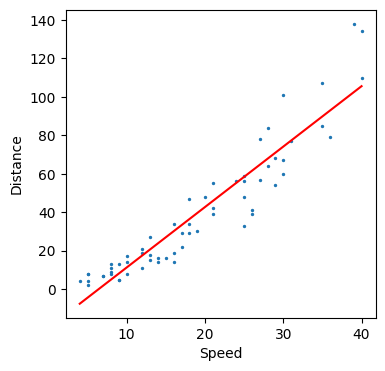

In [56]:
x, y = stop['Speed'], stop['Distance']
b1, b0 = np.polyfit(x, y, 1)

fig = plt.figure(figsize=(4, 4))
plt.scatter(x = stop['Speed'], y = stop['Distance'], s = 2)
plt.plot(x, b1 * x + b0, 'r')
plt.xlabel("Speed")
plt.ylabel("Distance")
plt.show()

#### 3. Briefly describe the relationship between Speed and Distance. (Hint: you should use 2 or 3 key words.)


Speed and Distance have a relatively strong positive correlation, but the residuals speard out as Speed increases. This means the date is heteroscedastic, and that stopping distance can't be predicted by this model as accurately as at lower speeds.

#### 4. Add the OLS regression line to the scatterplot you created in question 2. (Hint: use `np.polyfit`)

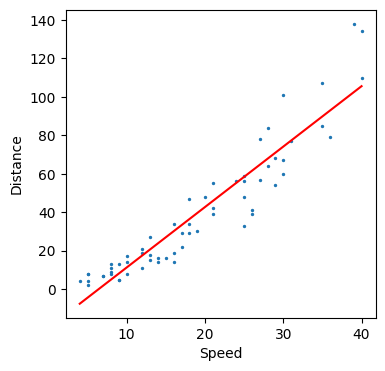

In [57]:
x, y = stop['Speed'], stop['Distance']
b1, b0 = np.polyfit(x, y, 1)

fig = plt.figure(figsize=(4, 4))
plt.scatter(x = stop['Speed'], y = stop['Distance'], s = 2)
plt.plot(x, b1 * x + b0, 'r')
plt.xlabel("Speed")
plt.ylabel("Distance")
plt.show()

#### 5. (a) Apply linear regression to the data (no transformations). (b) Print out a summary of the results. (c) Save the residuals and fitted values to the `stop` dataframe.


In [58]:
# Prepare data
y = stop['Distance']
X = sm.add_constant(stop['Speed'])
# Fit simple linear regression model using ordinary least squares
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())
stop['residuals'] = res.resid
stop['fittedvalues'] = res.fittedvalues

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     430.6
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           4.58e-29
Time:                        04:05:34   Log-Likelihood:                -239.82
No. Observations:                  62   AIC:                             483.6
Df Residuals:                      60   BIC:                             487.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.1309      3.231     -6.231      0.0

#### 6. Mathematically write out the fitted simple linear regression model for this data set using the coefficients you found above. Do not use "x" and "y" in your model - use variable names that are fairly descriptive.

$D_i = -20.1309 + 3.1416 \times S_i + \epsilon_i$

### Questions 7-12 involve using diagnostics to determine if the linear regression assumptions are met. For each assumption, (1) perform appropriate diagnostics to determine if the assumption is violated, and (2) explain whether or not you think the assumption is violated and why you think that.

#### 7. (L) X vs Y is linear (use at least two diagnostic tools)


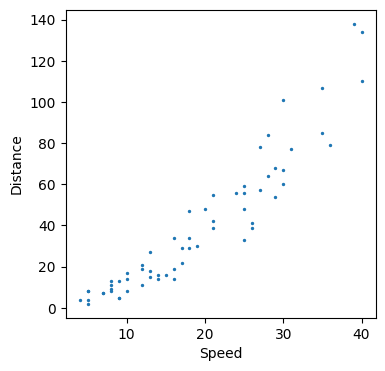

In [59]:
# Scatterplot
fig = plt.figure(figsize = (4, 4))
plt.scatter(x = stop['Speed'], y = stop['Distance'], s = 2)
plt.xlabel("Speed")
plt.ylabel("Distance")
plt.show()

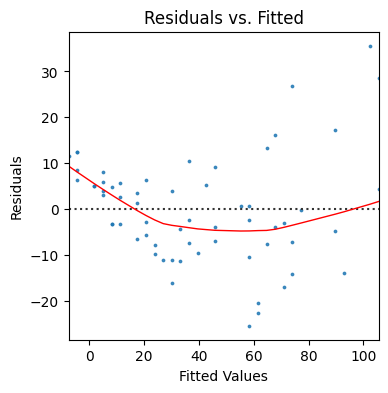

In [60]:
# Residuals versus Fitted Values
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = stop['fittedvalues'], y = stop['residuals'],
                          lowess = True,
                          scatter_kws = {'s': 3},
                          line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

The X versus Y plot seems to have a bit of a curve - a transformation would probably fix this - we'll examine that later.

#### 8. (I) The residuals are independent (no diagnostic tools - just think about how the data was collected and briefly write your thoughts)


The data source does not state whether the data were randomly sampled. If they were, then we could assume that the residuals are independent of one another.

#### 9. (N) The residuals are normally distributed and centered at zero (use at least three diagnostic tools)

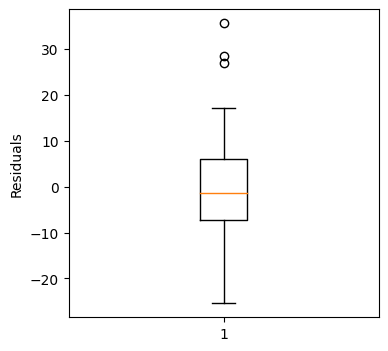

In [61]:
# Box Plot
fig = plt.figure(figsize = (4, 4))
plt.boxplot(stop['residuals'])
plt.ylabel("Residuals")
plt.show()

The mean of the residuals is zero, which is a good sign. However the distribution seems to be right-skewed, which is a possible cause for concern.

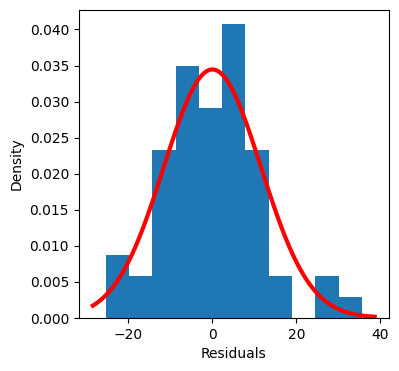

In [62]:
# Histogram
fig = plt.figure(figsize = (4, 4))

# plot histogram (density=True so that it's on the same scale as the normal distribution)
plt.hist(stop['residuals'], density = True, bins = 11)
plt.xlabel("Residuals")
plt.ylabel("Density")

# calculate mean and standard deviation
mean = np.mean(stop['residuals'])
sd = np.std(stop['residuals'])

# generate x values to plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# plot normal distribution curve
plt.plot(x, stats.norm.pdf(x, mean, sd), color = 'r', lw = 3)
plt.show()

Again, the distribution looks slightly right-skewed.

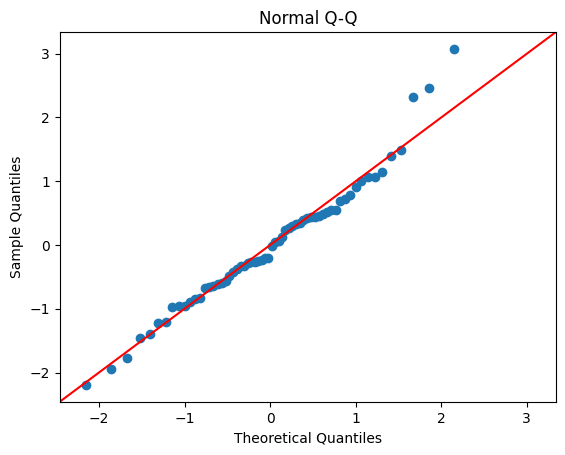

In [63]:
# Normal Probability Plot
sm.qqplot(stop['residuals'], line = '45', fit = True)
plt.title("Normal Q-Q")
plt.show()

This plot should show that points follow the red line, but there are a few which deviate from the line at the upper theoretical quantities.

#### 10. (E) The residuals have equal/constant variance across all values of X (use one diagnostic tool)

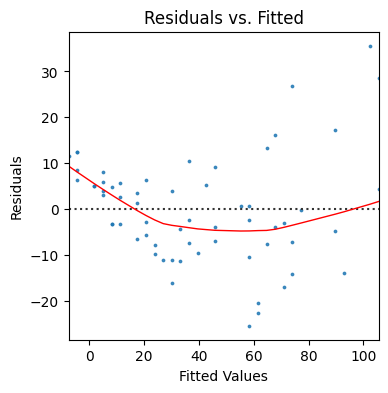

In [64]:
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = stop['fittedvalues'], y = stop['residuals'],
                          lowess = True,
                          scatter_kws = {'s': 3},
                          line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

The residuals should be equally spread around the horizontal line. There may be slightly more spread at larger fitted values than at smaller fitted values, thought it is not dramatic. This is only mildly concerning.

#### 11. (A) The model describes all observations (i.e., there are no influential points)) (use two new diagnostic tools, and refer to previous plots)

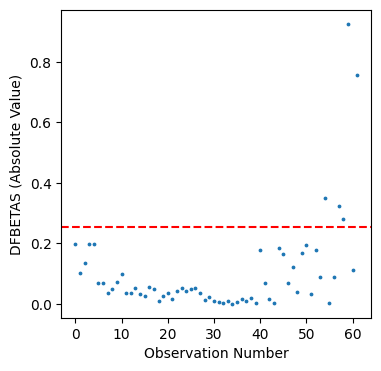

,Speed,Distance,residuals,fittedvalues,dfbetas
59,39,138,35.607827,102.392173,0.925566
61,40,134,28.466209,105.533791,0.756184
54,30,101,26.882391,74.117609,0.351323
57,35,107,17.174300,89.825700,0.324276
58,36,79,-13.967318,92.967318,-0.279937


In [65]:
# DFBETAS
dir(res)
res.get_influence().dfbetas
stop['dfbetas'] = res.get_influence().dfbetas[:,1]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFBETAS (Absolute Value)")
plt.xlabel("Observation Number")
plt.scatter(stop.index, np.abs(stop['dfbetas']), s = 3)
plt.axhline(y = 2 / np.sqrt(len(stop)), color = 'r', linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab potential outliers
outliers_dfbetas = stop[np.abs(stop['dfbetas']) > 2 / np.sqrt(len(stop))]
outliers_dfbetas.sort_values(by = 'dfbetas', ascending = False)

This DFBETAS chart shows me the same useful information as the Boxplot - namely that there are two outliers to be really concerened about looking into.

In [66]:
# DFFITS
res.get_influence().dffits
len(res.params)

2

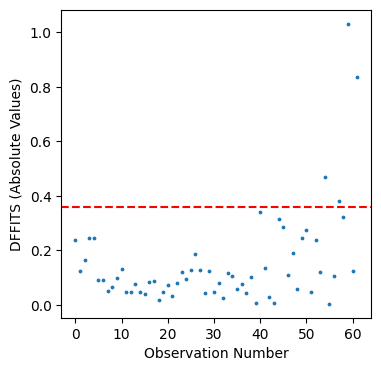

In [67]:
# DFFITS
stop['dffits'] = res.get_influence().dffits[0]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFFITS (Absolute Values)")
plt.xlabel("Observation Number")
plt.scatter(stop.index, np.abs(stop['dffits']), s = 3)
plt.axhline(y = 2 * np.sqrt(len(res.params) / len(stop)), color = 'r', linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab potential outliers
# outliers_dffits = cars[np.abs(cars['dffits']) > 2*np.sqrt(len(res.params)/len(cars))]
# outliers_dffits.sort_values(by = 'dffits', ascending = False)

Again, two points look like they are pretty far away from the rest, meaning they may be influential points.

#### 12. (R) Additional predictor variables are not required (no diagnostic tools - just think about the variables you have and if there are other variables you think would help predict the response)

This assumption probably is not met - lots of other variables could influence the stopping distance of a car including the types of brakes it has, how worn those brakes are, the weight of the car, and the tread type of the tire.

#### 13. Based on your analysis of the diagnostic measures, briefly discuss why this simple linear regression model on the raw data (not transformed) is *not* appropriate.

The data seems to show a subtle curve that can't be explained by raw linear regression. This is especially evident in the Q-Q Plot.

#### 14. Fix the model by making any necessary transformations. Justify the transformation you chose in words (why did you choose to transform just x, just y, or both?). (Note: you may wish to try multiple transformations, which is great, but I only want to see the model you end up choosing here, not all of your attempted models.)


(array([0.02478653, 0.01174099, 0.01174099, 0.00652277, 0.00913188,
        0.00391366, 0.00652277, 0.        , 0.00391366, 0.        ,
        0.00260911]),
 array([  2.        ,  14.36363636,  26.72727273,  39.09090909,
         51.45454545,  63.81818182,  76.18181818,  88.54545455,
        100.90909091, 113.27272727, 125.63636364, 138.        ]),
 <BarContainer object of 11 artists>)

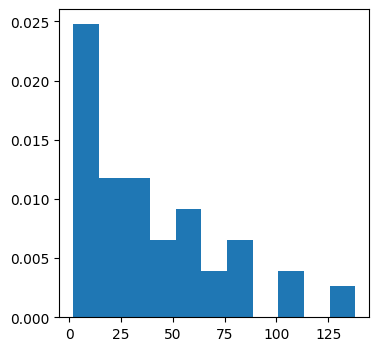

In [68]:
# Plot original Y
fig = plt.figure(figsize = (4, 4))
plt.hist(stop['Distance'], density = True, bins = 11)

(array([0.08584979, 0.12018971, 0.18886954, 0.08584979, 0.12018971,
        0.12018971, 0.12018971, 0.10301975, 0.03433992, 0.05150988,
        0.03433992]),
 array([ 1.41421356,  2.3535887 ,  3.29296385,  4.23233899,  5.17171413,
         6.11108927,  7.05046441,  7.98983956,  8.9292147 ,  9.86858984,
        10.80796498, 11.74734012]),
 <BarContainer object of 11 artists>)

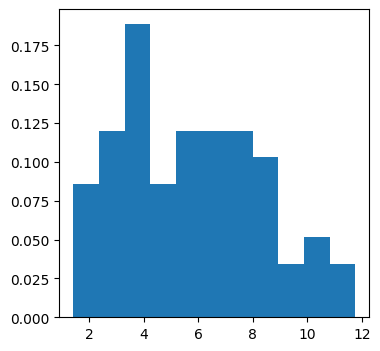

In [69]:
# Plot sqrt(Y) transform
MPG_transformed = np.sqrt(stop['Distance'])
fig = plt.figure(figsize = (4, 4))
plt.hist(MPG_transformed, density = True, bins = 11)

Since the trend looks pretty linear, but other assumptions were not met, we will try performing some transformations on Y. Performing both the Square Root transformation and the Sqrt transformation on Y gave a more normal curve of Y's distribution, but $\sqrt(y)$ is a bit less skewed, so I'll go with that one.

In [ ]:
# Transform y using Square Root
y_transformed = np.sqrt(stop['Distance'])

X = sm.add_constant(stop['Speed'])

# Fit simple linear regression model using ordinary least squares on the transformed y
mod = sm.OLS(y_transformed, X)
res = mod.fit()

#print(res.summary())

stop['residuals'] = res.resid
stop['fittedvalues'] = res.fittedvalues

### Now, in Questions 15-18, re-check your transformed model and verify that the assumptions (the assumptions that were addressed in the questions above) are met. Provide a brief discussion about how each of the previously violated assumptions are now satisfied. Also, provide the code you used to assess adherence to the assumptions. (Note that transforming will not change your responses about (I) the residuals being independent and (R) additional predictor variables not being required, so we will skip these assumptions here.)

#### 15. (L) Linearity (use at least two diagnostic tools)

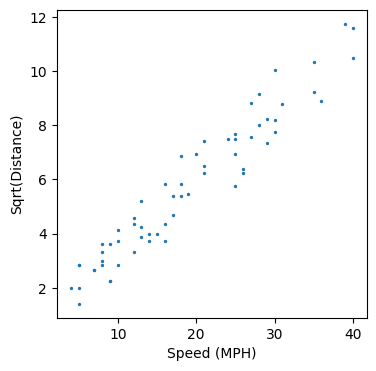

In [70]:
# Scatterplot with Sqrt-transformed y-values
fig = plt.figure(figsize = (4, 4))
plt.scatter(x=stop['Speed'], y=np.sqrt(stop['Distance']), s=2)
plt.xlabel("Speed (MPH)")
plt.ylabel("Sqrt(Distance)")
plt.show()

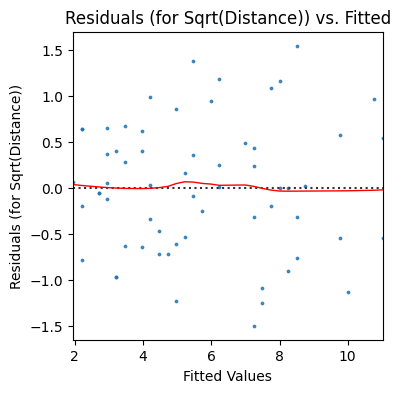

In [78]:
# Residuals vs Fitted Values
fig = plt.figure(figsize=(4, 4))
sns.residplot(x=stop['fittedvalues'], y=stop['residuals'],
              lowess=True,
              scatter_kws={'s': 3},
              line_kws={'color': 'red', 'lw': 1})
plt.title("Residuals (for Sqrt(Distance)) vs. Fitted")
plt.ylabel("Residuals (for Sqrt(Distance))")
plt.xlabel("Fitted Values")
plt.show()


These are so much more linear! This is a great sign for our assumptions being met.

#### 16. (N) The residuals are normally distributed and centered at zero (use at least three diagnostic tools)

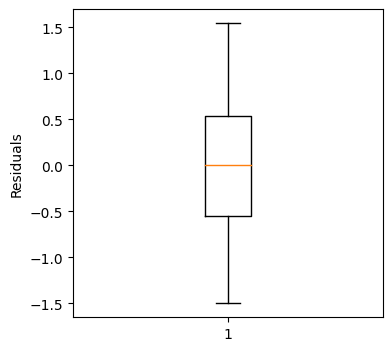

In [79]:
# Box Plot
fig = plt.figure(figsize = (4, 4))
plt.boxplot(stop['residuals'])
plt.ylabel("Residuals")
plt.show()

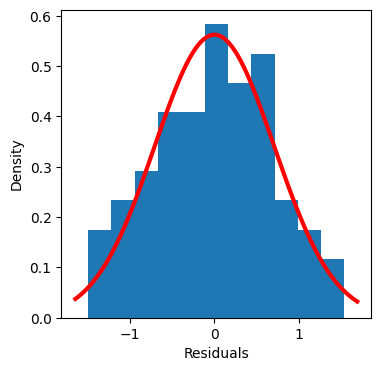

In [80]:
# Histogram
fig = plt.figure(figsize = (4, 4))

# plot histogram (density=True so that it's on the same scale as the normal distribution)
plt.hist(stop['residuals'], density = True, bins = 11)
plt.xlabel("Residuals")
plt.ylabel("Density")

# calculate mean and standard deviation
mean = np.mean(stop['residuals'])
sd = np.std(stop['residuals'])

# generate x values to plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# plot normal distribution curve
plt.plot(x, stats.norm.pdf(x, mean, sd), color = 'r', lw = 3)
plt.show()

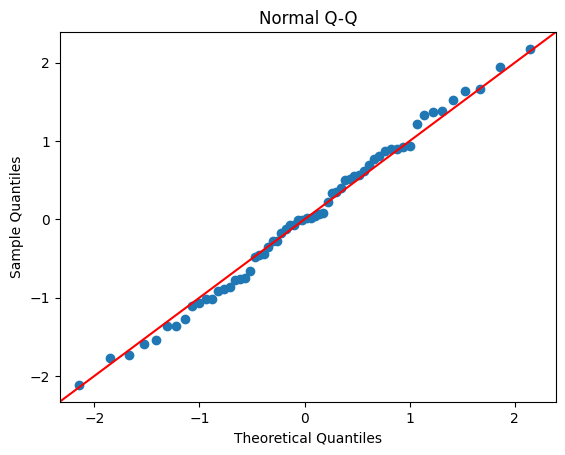

In [81]:
# Normal Probability Plot
sm.qqplot(stop['residuals'], line = '45', fit = True)
plt.title("Normal Q-Q")
plt.show()

These residuals are much more normally distributed than previously.

#### 17. (E) The residuals have equal/constant variance across all values of X (use one diagnostic tool)

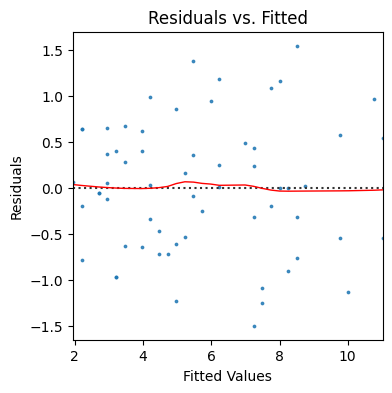

In [82]:
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = stop['fittedvalues'], y = stop['residuals'],
                          lowess = True,
                          scatter_kws = {'s': 3},
                          line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

The residuals do indeed seem to vary constantly over all values of X.

#### 18. (A) The model describes all observations (i.e., there are no influential points) (use two new diagnostic tools, and refer to previous plots)

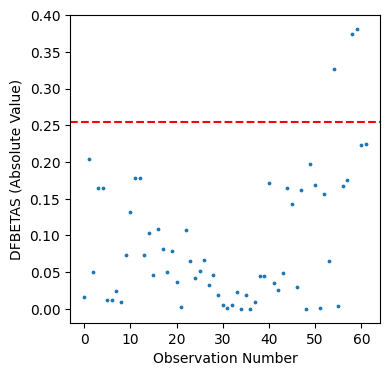

,Speed,Distance,residuals,fittedvalues,dfbetas,dffits
59,39,138,0.968771,10.778569,0.381652,1.031373
54,30,101,1.543500,8.506376,0.327336,0.470534
58,36,79,-1.132977,10.021171,-0.374343,-0.323331


In [83]:
# DFBETAS
dir(res)
res.get_influence().dfbetas
stop['dfbetas'] = res.get_influence().dfbetas[:,1]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFBETAS (Absolute Value)")
plt.xlabel("Observation Number")
plt.scatter(stop.index, np.abs(stop['dfbetas']), s = 3)
plt.axhline(y = 2 / np.sqrt(len(stop)), color = 'r', linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab potential outliers
outliers_dfbetas = stop[np.abs(stop['dfbetas']) > 2 / np.sqrt(len(stop))]
outliers_dfbetas.sort_values(by = 'dfbetas', ascending = False)

In [84]:
# DFFITS
res.get_influence().dffits
len(res.params)

2

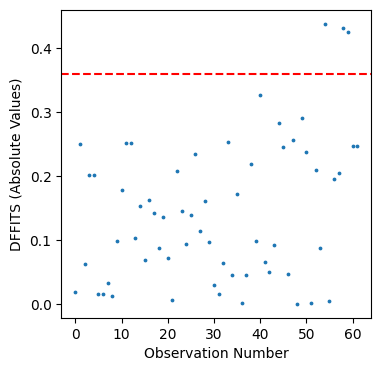

In [85]:
# DFFITS
stop['dffits'] = res.get_influence().dffits[0]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFFITS (Absolute Values)")
plt.xlabel("Observation Number")
plt.scatter(stop.index, np.abs(stop['dffits']), s = 3)
plt.axhline(y = 2 * np.sqrt(len(res.params) / len(stop)), color = 'r', linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab potential outliers
# outliers_dffits = cars[np.abs(cars['dffits']) > 2*np.sqrt(len(res.params)/len(cars))]
# outliers_dffits.sort_values(by = 'dffits', ascending = False)

Both the DFBETAS and DFFITS plots have only a few Y values above the threshold, and they're much closer than before to the rest of the values, so I consider this assumption met as well.

#### 19. Mathematically write out the fitted simple linear regression model for this data set using the coefficients you found above from your transformed model. Do not use "x" and "y" in your model - use variable names that are fairly descriptive.

$\sqrt(D_i) = -20.1309 + 3.1416 \times S_i + \epsilon_i$

#### 20. Plot your new fitted *curve* on the scatterplot of the original data (on the original scale - not the transformed scale). Do you think this curve fits the data better than the line you previously fit?


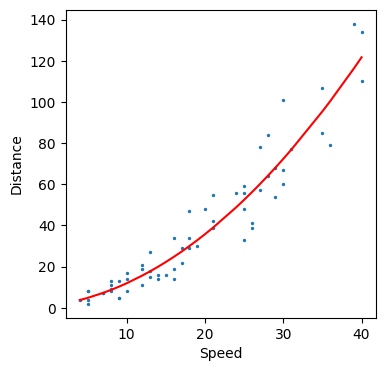

In [90]:
# Using the coefficients from the regression with sqrt(Distance) as the dependent variable
b0_transformed = res.params[0]
b1_transformed = res.params[1]

# Compute the predicted values on the sqrt(y) scale
y_pred_transformed = b0_transformed + b1_transformed * x

# Reverse the transformation to get the predicted values on the original scale
y_pred = y_pred_transformed**2

# Plotting
fig = plt.figure(figsize=(4, 4))
plt.scatter(x, y, s=2)
plt.plot(x, y_pred, 'r')
plt.xlabel("Speed")
plt.ylabel("Distance")
plt.show()

This curve appears to fit the data much better.

#### 21. Briefly summarize what you learned, personally, from this analysis about the statistics, model fitting process, etc.

It's really important to run all the different tests for assumption, even when it looks "okay" on the first few. All the assumptions in LINEAR are essential to making sure we have a good model, and it made a huge difference in the end!

#### 22. Briefly summarize what you learned from this analysis *to a non-statistician*. Write a few sentences about (1) the purpose of this data set and analysis and (2) what you learned about this data set from your analysis. Write your response as if you were addressing a business manager (avoid using statistics jargon) and just provide the main take-aways.



**Purpose of the Data Set and Analysis:** We looked at data comparing the speed of cars to the distance they took to come to a complete stop. The goal was to understand how speed affects stopping distance, which can be crucial information when considering road safety and setting speed limits.


**Findings:** As cars move faster, they generally require more distance to come to a full stop. However, the relationship isn't strictly linear—meaning, as speed increases, the stopping distance doesn't just increase at a fixed rate. Instead, for very high speeds, the stopping distance increases even more dramatically. This suggests that even small increases in speed at higher velocities could result in significantly longer stopping distances, emphasizing the importance of keeping speeds in check, especially in areas where quick stops are necessary.
